<a href="https://colab.research.google.com/github/asih1725/BIGDATA/blob/main/BIGDATA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana dengan tambahan kolom
data = [("Ali", 34, "DPR", "Golf", "Laki-laki"),
        ("Budi", 23, "DPRD", "Jalan sehat", "Laki-laki"),
        ("Citra", 29, "MPR", "Pilates", "Perempuan"),
        ("Dina", 45, "KPK", "Balet", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+---------+-----------+---------+
| Nama|Usia|Pekerjaan|       Hobi|   Gender|
+-----+----+---------+-----------+---------+
|  Ali|  34|      DPR|       Golf|Laki-laki|
| Budi|  23|     DPRD|Jalan sehat|Laki-laki|
|Citra|  29|      MPR|    Pilates|Perempuan|
| Dina|  45|      KPK|      Balet|Perempuan|
+-----+----+---------+-----------+---------+



In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45]
}
df_pandas = pd.DataFrame(data_pandas)

# 1. Menambahkan kolom baru, misalnya "Status Usia"
df_pandas["Status Usia"] = ["Dewasa" if usia >= 30 else "Muda" for usia in df_pandas["Usia"]]

# 2. Filtering data: ambil yang usia di atas 30
df_filtered = df_pandas[df_pandas["Usia"] > 30]

# 3. Mengurutkan berdasarkan usia (dari tertinggi ke terendah)
df_sorted = df_pandas.sort_values(by="Usia", ascending=False)

# Menampilkan hasil
print("DataFrame asli dengan kolom baru:\n", df_pandas, "\n")
print("Data yang usianya > 30:\n", df_filtered, "\n")
print("Data diurutkan berdasarkan usia (descending):\n", df_sorted)


DataFrame asli dengan kolom baru:
     Nama  Usia Status Usia
0    Ali    34      Dewasa
1   Budi    23        Muda
2  Citra    29        Muda
3   Dina    45      Dewasa 

Data yang usianya > 30:
    Nama  Usia Status Usia
0   Ali    34      Dewasa
3  Dina    45      Dewasa 

Data diurutkan berdasarkan usia (descending):
     Nama  Usia Status Usia
3   Dina    45      Dewasa
0    Ali    34      Dewasa
2  Citra    29        Muda
1   Budi    23        Muda


    Nama  Usia Pekerjaan
0    Ali    34       DPR
1   Budi    23      DPRD
2  Citra    29       MPR
3   Dina    45       KPK
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


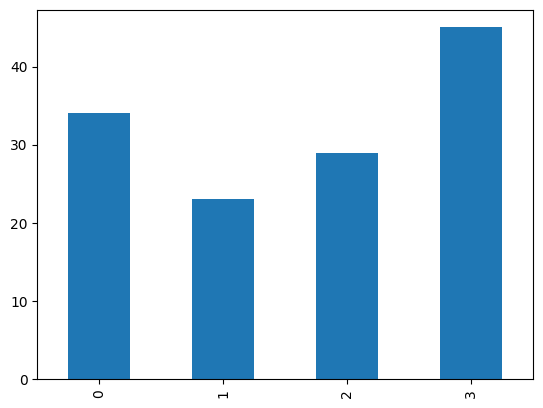

In [1]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["DPR", "DPRD", "MPR", "KPK"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

Hasil penggabungan DataFrame:
     Nama  Usia Pekerjaan
0    Ali    34       DPR
1   Budi    23      DPRD
2  Citra    29       MPR
3   Dina    45       KPK

Statistik deskriptif usia:
             Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


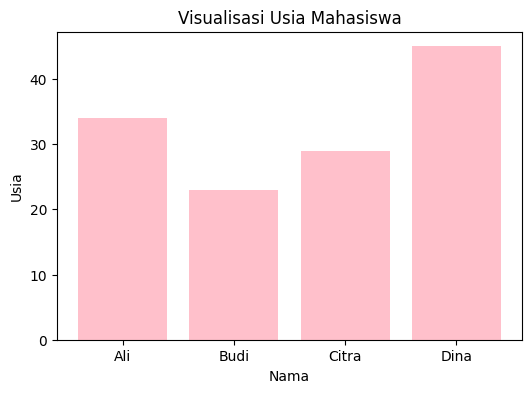

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame pertama
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45]
}
df_pandas = pd.DataFrame(data_pandas)

# DataFrame kedua
data_pandas_2 = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Pekerjaan": ["DPR", "DPRD", "MPR", "KPK"]
}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")

# Menampilkan hasil join
print("Hasil penggabungan DataFrame:\n", df_joined)

# Menghitung statistik deskriptif
print("\nStatistik deskriptif usia:\n", df_pandas.describe())

# Visualisasi: Plot usia dalam bentuk bar chart
plt.figure(figsize=(6,4))
plt.bar(df_joined["Nama"], df_joined["Usia"], color="pink")
plt.xlabel("Nama")
plt.ylabel("Usia")
plt.title("Visualisasi Usia Mahasiswa")
plt.show()


In [8]:



from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder.appName("ContohKonversi").getOrCreate()

# Membuat DataFrame PySpark
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas_from_spark)

# Menampilkan hasil
print("DataFrame hasil konversi ke Pandas:")
print(df_pandas_from_spark)

print("\nDataFrame hasil konversi kembali ke PySpark:")
df_spark_from_pandas.show()


DataFrame hasil konversi ke Pandas:
    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45

DataFrame hasil konversi kembali ke PySpark:
+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



In [9]:

# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



(    Nama  Usia
 0    Ali    34
 1   Budi    23
 2  Citra    29
 3   Dina    45,
 None)

In [10]:
import pandas as pd

# Data dari "PySpark" (simulasi, sebenarnya Pandas)
data_spark = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45]
}
df_from_spark = pd.DataFrame(data_spark)

# Data dari Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Pekerjaan": ["DPR", "DPRD", "MPR", "KPK"]
}
df_from_pandas = pd.DataFrame(data_pandas)

# Menggabungkan keduanya
df_joined = pd.merge(df_from_spark, df_from_pandas, on="Nama")

# Analisis sederhana: menghitung rata-rata usia
rata_rata_usia = df_joined["Usia"].mean()

# Menampilkan hasil
print("Data hasil gabungan:\n", df_joined)
print("\nRata-rata usia:", rata_rata_usia)


Data hasil gabungan:
     Nama  Usia Pekerjaan
0    Ali    34       DPR
1   Budi    23      DPRD
2  Citra    29       MPR
3   Dina    45       KPK

Rata-rata usia: 32.75


In [ ]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



(    Nama  Usia
 0    Ali    34
 1   Budi    23
 2  Citra    29
 3   Dina    45,
 None)

In [11]:
import pandas as pd

# Data dari "PySpark" (simulasi, sebenarnya pakai Pandas)
data_spark = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Usia": [34, 23, 29, 45]
}
df_from_spark = pd.DataFrame(data_spark)

# Data dari Pandas
data_pandas = {
    "Nama": ["Ali", "Budi", "Citra", "Dina"],
    "Pekerjaan": ["DPR", "DPRD", "MPR", "KPK"]
}
df_from_pandas = pd.DataFrame(data_pandas)

# Gabungkan keduanya berdasarkan kolom "Nama"
df_joined = pd.merge(df_from_spark, df_from_pandas, on="Nama")

# Hitung nilai maksimum usia
usia_maksimum = df_joined["Usia"].max()

# Tampilkan hasil
print("Data hasil gabungan:\n", df_joined)
print("\nNilai maksimum usia:", usia_maksimum)


Data hasil gabungan:
     Nama  Usia Pekerjaan
0    Ali    34       DPR
1   Budi    23      DPRD
2  Citra    29       MPR
3   Dina    45       KPK

Nilai maksimum usia: 45
